# Pyber Challenge and Analysis

## Setup

In [1]:
# Add Matplotlib inline magic command

%matplotlib inline

# dependencies

import pandas as pd
import matplotlib.pyplot as mtp
import numpy as np
import statistics as sts
import os



In [2]:
# reading files

city_data_load = os.path.join('.', 'Resources', 'city_data.csv')

city_data_df = pd.read_csv(city_data_load)

city_data_df.head(10)


,city,driver_count,type
0,Richardfort,38,Urban
1,Williamsstad,59,Urban
2,Port Angela,67,Urban
3,Rodneyfort,34,Urban
4,West Robert,39,Urban
5,West Anthony,70,Urban
6,West Angela,48,Urban
7,Martinezhaven,25,Urban
8,Karenberg,22,Urban
9,Barajasview,26,Urban


In [3]:
ride_data_load = os.path.join('.', 'Resources', 'ride_data.csv')

ride_data_df = pd.read_csv(ride_data_load)

ride_data_df.head(10)

,city,date,fare,ride_id
0,Lake Jonathanshire,2019-01-14 10:14:22,13.83,5739410935873
1,South Michelleport,2019-03-04 18:24:09,30.24,2343912425577
2,Port Samanthamouth,2019-02-24 04:29:00,33.44,2005065760003
3,Rodneyfort,2019-02-10 23:22:03,23.44,5149245426178
4,South Jack,2019-03-06 04:28:35,34.58,3908451377344
5,South Latoya,2019-03-11 12:26:48,9.52,1994999424437
6,New Paulville,2019-02-27 11:17:56,43.25,793208410091
7,Simpsonburgh,2019-04-26 00:43:24,35.98,111953927754
8,South Karenland,2019-01-08 03:28:48,35.09,7995623208694
9,North Jasmine,2019-03-09 06:26:29,42.81,5327642267789


In [4]:
# inspecting, cleaning and merging data

city_data_df.count()

city_data_df.isnull().sum()
# all zeros, so no empty values

city_data_df.dtypes


ride_data_df.count()

ride_data_df.isnull().sum()
# all zeros, so no empty values

ride_data_df.dtypes

# merging data from common city coloums
pyber_data_df = pd.merge(ride_data_df, city_data_df, how="left", on=["city", "city"])

pyber_data_df.head(10)

pyber_data_df.tail(10)



,city,date,fare,ride_id,driver_count,type
2365,Lake Jamie,2019-04-19 04:32:47,16.29,3518682119233,4,Rural
2366,North Holly,2019-03-18 10:38:05,40.34,3787775176860,8,Rural
2367,Michaelberg,2019-01-27 18:43:05,38.42,862622008020,6,Rural
2368,Lake Jamie,2019-04-29 01:58:44,54.22,2489264790267,4,Rural
2369,Bradshawfurt,2019-01-30 10:55:23,51.39,1328274868072,7,Rural
2370,Michaelberg,2019-04-29 17:04:39,13.38,8550365057598,6,Rural
2371,Lake Latoyabury,2019-01-30 00:05:47,20.76,9018727594352,2,Rural
2372,North Jaime,2019-02-10 21:03:50,11.11,2781339863778,1,Rural
2373,West Heather,2019-05-07 19:22:15,44.94,4256853490277,4,Rural
2374,Newtonview,2019-04-25 10:20:13,55.84,9990581345298,1,Rural


## Summary DataFrame

Technical Analysis Deliverable 1: A Summary DataFrame

In [5]:
# aggregating the total rides, total drivers, and total fares for each city type

total_rides_type=pyber_data_df.groupby(['type']).count()['ride_id']
total_rides_type


city_data_df.dtypes

total_drivers_type=city_data_df.groupby(['type']).sum()['driver_count']
total_drivers_type

total_fares_type=pyber_data_df.groupby(['type']).sum()['fare']
total_fares_type



type
Rural        4327.93
Suburban    19356.33
Urban       39854.38
Name: fare, dtype: float64

In [6]:
# finding avg fare per ride and avg fare per driver

avg_fare_ride = total_fares_type/total_rides_type
avg_fare_ride

avg_fare_driver = total_fares_type/total_drivers_type
avg_fare_driver

type
Rural       55.486282
Suburban    39.502714
Urban       16.571468
dtype: float64

In [7]:
# # creating new summary dataframe

# pyber_summary_data_df = []

# pyber_summary_data_df.index.name = ""

pyber_summary_data_df = pd.DataFrame({
    'Total Rides':total_rides_type,
    'Total Drivers':total_drivers_type,
    'Total Fares':total_fares_type,
    'Average Fare per Ride':avg_fare_ride,
    'Average Fare per Driver':avg_fare_driver})

pyber_summary_data_df.index.name = ""

pyber_summary_data_df

,Total Rides,Total Drivers,Total Fares,Average Fare per Ride,Average Fare per Driver
,,,,,
Rural,125,78,4327.93,34.623440,55.486282
Suburban,625,490,19356.33,30.970128,39.502714
Urban,1625,2405,39854.38,24.525772,16.571468


In [8]:
# formatting

pyber_summary_data_df['Total Rides'] = pyber_summary_data_df['Total Rides'].map('{:,}'.format)

pyber_summary_data_df['Total Drivers'] = pyber_summary_data_df['Total Drivers'].map('{:,}'.format)

pyber_summary_data_df['Total Fares'] = pyber_summary_data_df['Total Fares'].map('${:,.2f}'.format)

pyber_summary_data_df['Average Fare per Ride'] = pyber_summary_data_df['Average Fare per Ride'].map('${:,.2f}'.format)

pyber_summary_data_df['Average Fare per Driver'] = pyber_summary_data_df['Average Fare per Driver'].map('${:,.2f}'.format)

pyber_summary_data_df

,Total Rides,Total Drivers,Total Fares,Average Fare per Ride,Average Fare per Driver
,,,,,
Rural,125,78,"$4,327.93",$34.62,$55.49
Suburban,625,490,"$19,356.33",$30.97,$39.50
Urban,"1,625","2,405","$39,854.38",$24.53,$16.57


## Multiple-Line Plot
Technical Analysis Deliverable 2: Multiple-Line Plot for the Sum of the Fares for Each City Type

In [9]:
# formatting and new index for merged dataframe

pyber_data_df.head()

pyber_data_df=pyber_data_df.rename(columns={
    'city':'City',
    'date':'Date',
    'fare':'Fare',
    'ride_id':'Ride ID',
    'driver_count':'No. Drivers',
    'type':'City Type'
})

pyber_data_df.head()

pyber_data_df.set_index(pyber_data_df['Date'], inplace=True)

pyber_data_df.head()

,City,Date,Fare,Ride ID,No. Drivers,City Type
Date,,,,,,
2019-01-14 10:14:22,Lake Jonathanshire,2019-01-14 10:14:22,13.83,5739410935873,5,Urban
2019-03-04 18:24:09,South Michelleport,2019-03-04 18:24:09,30.24,2343912425577,72,Urban
2019-02-24 04:29:00,Port Samanthamouth,2019-02-24 04:29:00,33.44,2005065760003,57,Urban
2019-02-10 23:22:03,Rodneyfort,2019-02-10 23:22:03,23.44,5149245426178,34,Urban
2019-03-06 04:28:35,South Jack,2019-03-06 04:28:35,34.58,3908451377344,46,Urban


In [10]:
# new dataframe with date, city type and fare

pyber_data_df.columns

specific_columns = ["Date","City Type","Fare"]
# specific_columns = ["City Type","Fare"]
pyber_city_fares_df= pyber_data_df[specific_columns].copy()

pyber_city_fares_df.describe

pyber_city_fares_df.drop(['Date'], axis=1, inplace=True)

pyber_city_fares_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2375 entries, 2019-01-14 10:14:22 to 2019-04-25 10:20:13
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   City Type  2375 non-null   object 
 1   Fare       2375 non-null   float64
dtypes: float64(1), object(1)
memory usage: 55.7+ KB


In [11]:
# converting to datetime
pyber_city_fares_df.index = pd.to_datetime(pyber_data_df.index)

pyber_city_fares_df

,City Type,Fare
Date,,
2019-01-14 10:14:22,Urban,13.83
2019-03-04 18:24:09,Urban,30.24
2019-02-24 04:29:00,Urban,33.44
2019-02-10 23:22:03,Urban,23.44
2019-03-06 04:28:35,Urban,34.58
...,...,...
2019-04-29 17:04:39,Rural,13.38
2019-01-30 00:05:47,Rural,20.76
2019-02-10 21:03:50,Rural,11.11


In [15]:
# calculating city type fares

city_type_fares = pyber_city_fares_df.groupby(["City Type", "Date"]).sum()["Fare"]

city_type_fares

city_type_fares_df = pd.DataFrame(city_type_fares)

city_type_fares_df.index

city_type_fares_df=city_type_fares_df.reset_index()

city_type_fares_df



,City Type,Date,Fare
0,Rural,2019-01-01 09:45:36,43.69
1,Rural,2019-01-02 11:18:32,52.12
2,Rural,2019-01-03 19:51:01,19.90
3,Rural,2019-01-04 03:31:26,24.88
4,Rural,2019-01-06 07:38:40,47.33
...,...,...,...
2370,Urban,2019-05-08 04:20:00,21.99
2371,Urban,2019-05-08 04:39:49,18.45
2372,Urban,2019-05-08 07:29:01,18.55
2373,Urban,2019-05-08 11:38:35,19.77


In [16]:
# pivot table with expanded city types as coloumn headers

pivot_cities = city_type_fares_df.pivot(index="Date", columns="City Type")["Fare"]
pivot_cities

# using .loc to access jan to april dates, then making new dataframe

jan_apl_fare=pivot_cities.loc['2019-01-01':'2019-04-28']
jan_apl_fare

City Type,Rural,Suburban,Urban
Date,,,
2019-01-01 00:08:16,NaN,NaN,37.91
2019-01-01 00:46:46,NaN,47.74,NaN
2019-01-01 02:07:24,NaN,24.07,NaN
2019-01-01 03:46:50,NaN,NaN,7.57
2019-01-01 05:23:21,NaN,NaN,10.75
...,...,...,...
2019-04-28 14:28:36,NaN,NaN,11.46
2019-04-28 16:29:16,NaN,NaN,36.42
2019-04-28 17:26:52,NaN,NaN,31.43


In [17]:
# resampling df with weekly bins and summing the fares for each week

jan_apl_fare_weekly=jan_apl_fare.resample("W").sum()
jan_apl_fare_weekly

City Type,Rural,Suburban,Urban
Date,,,
2019-01-06,187.92,721.60,1661.68
2019-01-13,67.65,1105.13,2050.43
2019-01-20,306.00,1218.20,1939.02
2019-01-27,179.69,1203.28,2129.51
2019-02-03,333.08,1042.79,2086.94
2019-02-10,115.80,974.34,2162.64
2019-02-17,95.82,1045.50,2235.07
2019-02-24,419.06,1412.74,2466.29
2019-03-03,175.14,858.46,2218.20


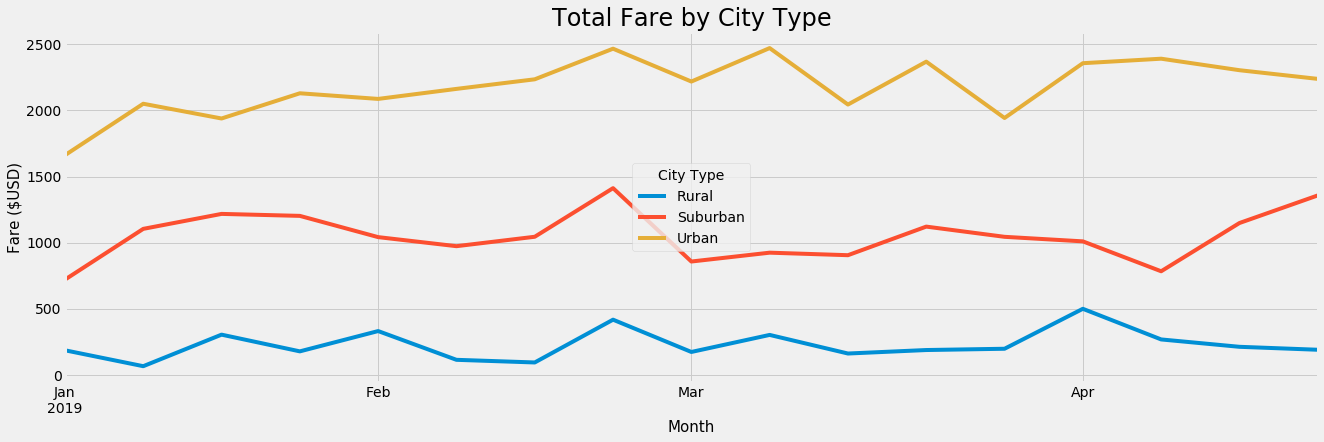

In [34]:
# using object-oriented approach to make the lineplot

from matplotlib import style

style.use('fivethirtyeight')

ax = jan_apl_fare_weekly.plot(figsize = (20, 6))

ax.set_title("Total Fare by City Type", fontsize=24)

ax.set_xlabel("Month", fontsize=15)

ax.set_ylabel("Fare ($USD)",fontsize=15)

mtp.savefig("./analysis/Challenge_Fare_Summary.png")

mtp.show()


